<a href="https://colab.research.google.com/github/sdpmrya/GAIADataAnalysis/blob/main/ADQLGaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install pyvo

In [ ]:
!pip install pyvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 832 kB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import pyvo as vo
from astropy.io import ascii

In [ ]:
query2 = """SELECT TOP 3000000
               g.phot_g_mean_mag AS mag, d.r_med_geo as dspc_geo, g.phot_rp_mean_mag as magrp, g.phot_bp_mean_mag as magbp
               FROM gaia.edr3lite AS g, gedr3dist.main AS d
               WHERE g.source_id = d.source_id AND g.parallax_error/g.parallax < 0.01 AND g.parallax > 0 AND g.parallax_error > 0
          """

In [ ]:
tap_service1 = vo.dal.TAPService("http://dc.zah.uni-heidelberg.de/__system__/tap/run/tap")
print(tap_service1.maxrec,tap_service1.hardlimit)

job1 = tap_service1.submit_job(query2,maxrec=16000000)

job1.run()

job_url1 = job1.url
job1 = vo.dal.tap.AsyncTAPJob(job_url1)

20000 16000000


In [ ]:
print(job1.phase)

EXECUTING


In [ ]:
tap_result1 = job1.fetch_result()
tap1 = tap_result1.to_table()

In [ ]:
mag1 = tap1['mag']
dspcgeo1 = tap1['dspc_geo']
magrp1 = tap1['magrp']
magbp1 = tap1['magbp']
length1  = len(mag1)

In [ ]:
'AND g.parallax_error/g.parallax < 0.01 AND g.parallax > 0 AND g.parallax_error > 0'

In [ ]:
query3 = """SELECT
            g.source_id, g.ra, g.dec, g.parallax , g.phot_g_mean_mag AS mag, g.phot_rp_mean_mag as magrp, g.phot_bp_mean_mag as magbp, g.parallax_error as par_err, d.r_med_geo as dspc_geo, d.r_med_photogeo as dspc_photogeo, g.pmra as pmra, g.pmdec as pmdec
                FROM gaia.edr3lite AS g, gedr3dist.main AS d
                WHERE g.source_id = d.source_id AND g.parallax_error/g.parallax < 0.01 AND g.parallax > 0 AND g.parallax_error > 0 AND d.r_med_geo < 60

                      AND g.phot_g_mean_mag IS NOT NULL AND g.phot_rp_mean_mag IS NOT NULL AND g.phot_bp_mean_mag IS NOT NULL
                """

In [ ]:
# M1 - (20/6)*(Mbp1-Mrp1) -7 > 0
# M1 = np.array(mag1 - 5*np.log10(dspcgeo1/10))

# AND ((g.phot_g_mean_mag - 5*LOG10(d.r_med_geo/10)) - (20/6)*((g.phot_bp_mean_mag - 5*LOG10(d.r_med_geo/10)) - (g.phot_rp_mean_mag - 5*LOG10(d.r_med_geo/10))) -7) > 0

In [ ]:
tap_service = vo.dal.TAPService("http://dc.zah.uni-heidelberg.de/__system__/tap/run/tap")
print(tap_service.maxrec,tap_service.hardlimit)

job = tap_service.submit_job(query3,maxrec=16000000)

job.run()

job_url = job.url
job = vo.dal.tap.AsyncTAPJob(job_url)

20000 16000000


In [ ]:
print(job.phase)

COMPLETED


In [ ]:
tap_result = job.fetch_result()
tap = tap_result.to_table()

In [ ]:
type(tap_result)

pyvo.dal.tap.TAPResults

In [ ]:
id = tap['source_id']
ra1       = tap['ra']
dec1      = tap['dec']
parallax = tap['parallax']
mag      = tap['mag']
magrp = tap['magrp']
magbp = tap['magbp']
parerr = tap['par_err']
dspcgeo = tap['dspc_geo']
dspcphotgeo = tap['dspc_photogeo']
pmra = tap['pmra']
pmdec = tap['pmdec']

In [ ]:
tap

source_id,ra,dec,parallax,mag,magrp,magbp,par_err,dspc_geo,dspc_photogeo,pmra,pmdec
,deg,deg,mas,mag,mag,mag,mas,pc,pc,mas / yr,mas / yr
int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
56413781254648960,53.539108936825045,17.83394200783101,23.778755,18.38292,17.368286,18.48429,0.19871937,41.995445,42.03258,95.352585,-309.81607
563004280465719040,17.211638579206834,76.00516727265472,19.383062,17.508942,17.087372,17.816822,0.068265215,51.596115,51.530167,237.61244,44.736084
5631727733184669440,140.94038987368108,-30.363451818147478,21.297922,14.932706,14.981729,14.896825,0.025773369,46.883842,46.893837,-38.510914,2.1813564
5633102260158519936,142.54827449404186,-29.995038440597977,30.531954,17.247923,16.633682,17.695028,0.0731876,32.723984,32.72961,132.77217,77.7793
5635344954642200576,136.6691696577366,-30.20706578983897,20.224552,15.772745,15.656934,15.844103,0.037004855,49.342484,49.351273,85.29469,-178.61943
5638709838186967680,130.4997598917196,-34.12637087960712,22.960974,16.081503,15.87625,16.195131,0.040145505,43.487946,43.492634,99.503,-244.83774
5639391810273308416,130.37950135632184,-32.93649496565008,117.396126,11.822395,11.670317,11.900727,0.020453347,8.514545,8.514256,-1061.1577,1345.8999
5640774308699388416,132.34337466814745,-32.38684309668879,28.710175,17.79878,14.282268,16.04762,0.2682689,34.71995,34.808994,-66.44912,-378.85922


In [ ]:
l = len(ra1)

print(l,type(tap['ra']))

3434 <class 'astropy.table.column.MaskedColumn'>


In [ ]:
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic)
import astropy.coordinates as coord
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
dta = SkyCoord(ra = tap['ra'], dec = tap['dec'], frame='icrs')

In [ ]:
gal = dta.galactic

In [ ]:
l = gal.l

In [ ]:
def coordinates_aitoff_plot(coords):
  fig,ax1 = plt.subplots(figsize=(15,6), subplot_kw=dict(projection='aitoff'))
  sph=coords.spherical
  cs = ax1.scatter(-sph.lon.wrap_at(180*u.deg).radian, sph.lat.radian, s=0.7, color='red')
  plt.xlabel('ra')
  plt.ylabel('dec')
  #cs = ax1.hist2d(-sph.lon.wrap_at(180*u.deg).radian, sph.lat.radian,
                 #bins=[120,120], norm = colors.LogNorm()

  def fmt_func(x,pos):
    val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
    return f'${val:.0f}' + r'^{\circ}$'

  ticker = mpl.ticker.FuncFormatter(fmt_func)
  ax1.xaxis.set_major_formatter(ticker)

  ax1.grid()
  #ax.colorbar()

  return fig,ax1

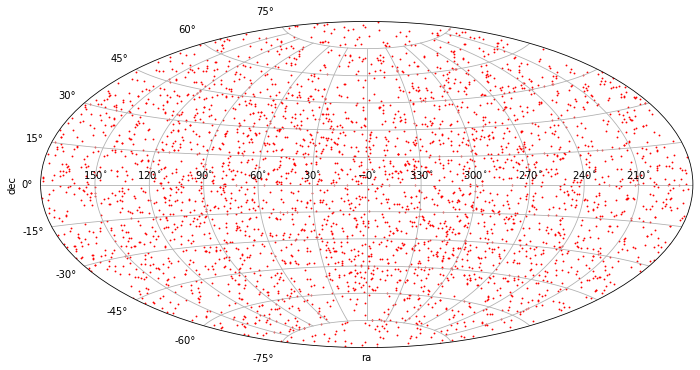

In [ ]:
fig,ax = coordinates_aitoff_plot(gal)

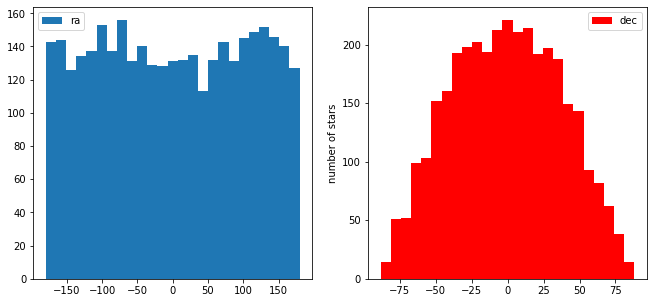

In [ ]:
fig,ax = plt.subplots(1,2,figsize=[11,5])
ax[0].hist(np.array(gal.l) - 180 ,label='ra', bins= 25,)
ax[1].hist(np.array(gal.b) , label='dec',bins= 25, color='red')
ax[0].legend()
ax[1].legend()
plt.ylabel('number of stars')

plt.show()

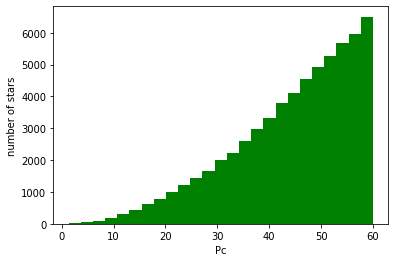

In [ ]:
import numpy as np
plt.hist((dspcgeo),color='green', bins=25)
plt.xlabel('Pc')
plt.ylabel('number of stars')
plt.show()

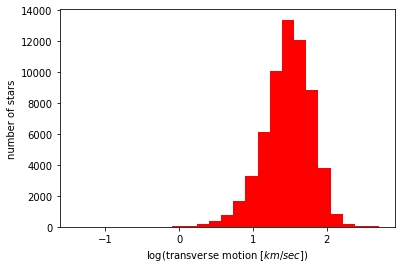

In [ ]:
pmra = np.array(pmra)
pmdec = np.array(pmdec)
pm = np.sqrt(pmra**2 + pmdec**2)
trm = 4.74*(pm*dspcgeo/1000)
plt.hist(np.log10(trm),color='red', bins=25)
plt.xlabel('log(transverse motion $[km/sec]$)')
plt.ylabel('number of stars')
plt.show()

In [ ]:
np.mean(trm)

37.74263908447855

In [ ]:
np.std(trm)

27.921717849777917

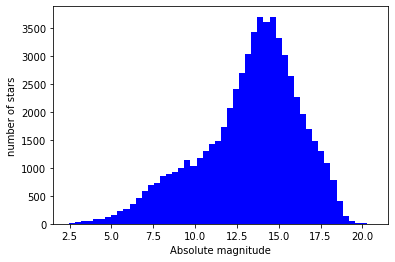

In [ ]:
plt.hist(mag, color='blue',bins=50)
plt.xlabel('Absolute magnitude')
plt.ylabel('number of stars')
plt.show()

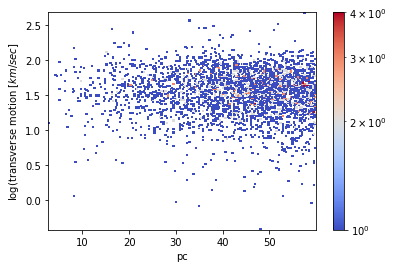

In [ ]:
fig = plt.figure()
plt.hist2d((dspcgeo), np.log10(trm), norm= colors.LogNorm(), bins=200,cmap='coolwarm')
plt.colorbar()
plt.xlabel('pc')
plt.ylabel('log(transverse motion $[km/sec]$')
plt.show()

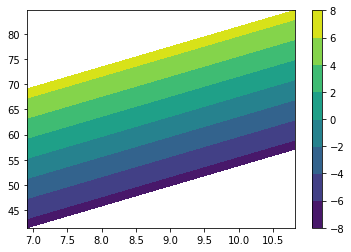

In [ ]:
# L vs T:-
t = np.log(np.linspace(1000,50000,2000))
r = np.log(np.linspace(0.001,1000,2000))
sig = 3.8*10e26/(5500e4 * (4*3.14*695508e2))
#ar = 4*3.14*r**2

T,R = np.meshgrid(t,r)
L = 4*T + 2*R + np.log(4*3.14*sig)
plt.contourf(T,L,R)

plt.colorbar()
plt.show()

In [ ]:
M = np.array(mag - 5*np.log10(dspcgeo/10))
Mrp = np.array(magrp - 5*np.log10(dspcgeo/10))
Mbp = np.array(magbp - 5*np.log10(dspcgeo/10))

In [ ]:
np.mean(np.log(trm))

3.382517471551822

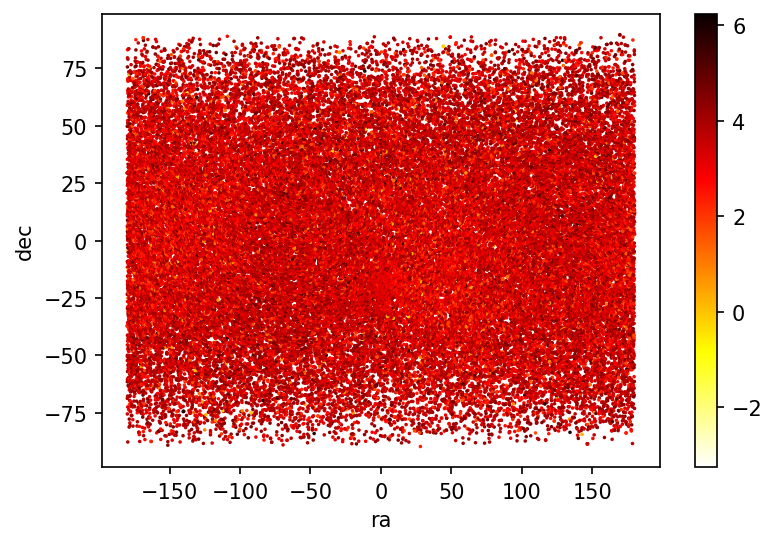

In [ ]:
#sph = coords.spherical
fig = plt.figure(dpi=150)
#plt.hist2d( gal.l,  gal.b , cmap='gray_r', bins=[150,150])
plt.scatter(np.array(gal.l) - 180, gal.b,s=0.5,c= np.log(trm) ,cmap='hot_r')
plt.xlabel('ra')
plt.ylabel('dec')
plt.colorbar()
plt.show()

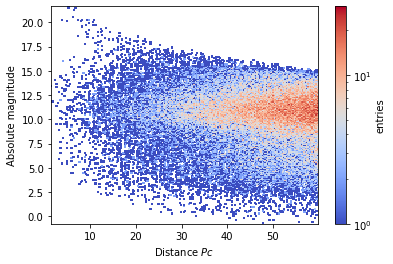

In [ ]:
fig = plt.figure()
plt.hist2d((dspcgeo), M , bins=200 ,cmap='coolwarm', norm= colors.LogNorm())
plt.colorbar(label='entries')
plt.xlabel('Distance ${Pc}$')
plt.ylabel('Absolute magnitude')
plt.show()

In [ ]:
fig = plt.figure()
plt.hist2d(M, np.log10(pm), norm=colors.LogNorm(), bins=200,cmap='coolwarm')
plt.colorbar()
plt.xlabel('Absolute magnitude')
plt.ylabel('log(proper motion $[mas]$')
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
xp = np.linspace(-2,6,50)
yp = (20/6)*xp + 7

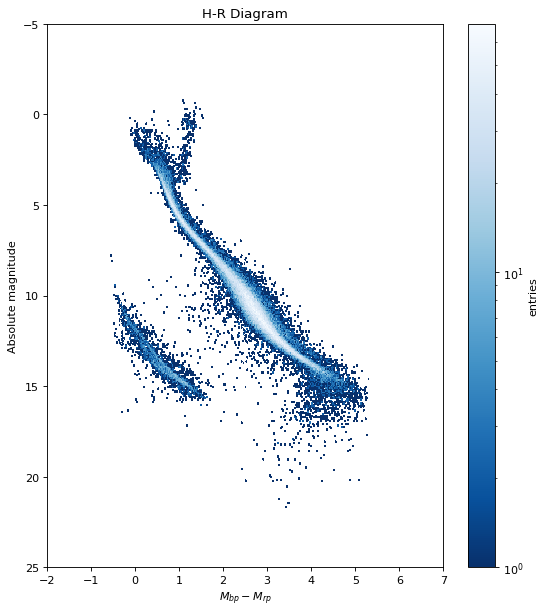

In [ ]:
fig = plt.figure(figsize=[8,9], dpi=80)
ax = plt.axes()
h2 = plt.hist2d(Mbp-Mrp, M, bins=400, range=[[-2,7],[-5,25]], cmap='Blues_r', norm= colors.LogNorm())
plt.xlabel('$M_{bp} - M_{rp}$')
plt.ylabel('Absolute magnitude')
#plt.plot(xp,yp)
plt.title('H-R Diagram')
plt.gca()
ax.invert_yaxis()
plt.colorbar(label='entries')
plt.show()

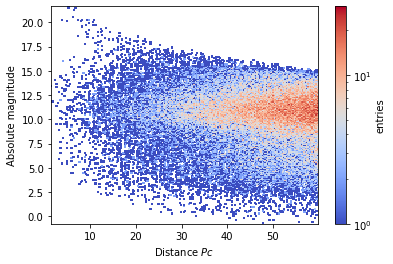

In [ ]:
fig = plt.figure()
plt.hist2d((dspcgeo), M , bins=200 ,cmap='coolwarm', norm= colors.LogNorm())
plt.colorbar(label='entries')
plt.xlabel('Distance ${Pc}$')
plt.ylabel('Absolute magnitude')
plt.show()

In [ ]:
b1=[]
M1 = np.array(mag1 - 5*np.log10(dspcgeo1/10))
Mrp1 = np.array(magrp1 - 5*np.log10(dspcgeo1/10))
Mbp1 = np.array(magbp1 - 5*np.log10(dspcgeo1/10))

for i in range(0,length1):
  if ( mth.isnan(M1[i])):
    b1.append(i)
  elif ( mth.isnan(Mrp1[i])):
    b1.append(i)
  elif ( mth.isnan(Mbp1[i])):
    b1.append(i)

M1 = np.delete(M1,b1)
Mrp1 = np.delete(Mrp1,b1)
Mbp1 = np.delete(Mbp1,b1)

print (length1,len(M1))

NameError: ignored

In [ ]:
h2[0]

In [ ]:
fig = plt.figure(figsize=[8,9], dpi=80)
ax = plt.axes()
h1 = plt.hist2d(Mbp1-Mrp1, M1, bins=400 ,cmap='Blues_r' ,range=[[-2,7],[-5,25]], norm= colors.LogNorm())
plt.xlabel('$M_{bp} - M_{rp}$')
plt.ylabel('Absolute magnitude')
plt.title('H-R Diagram')
plt.gca()
ax.invert_yaxis()
plt.colorbar(label='entries')
plt.show()

In [ ]:
ha, xedges, yedges = np.histogram2d(Mbp-Mrp, M, bins=400)
hb, xedges1, yedges1 = np.histogram2d(Mbp1-Mrp1, M1, bins=400)

In [ ]:
plt.figure(dpi=120)
plt.pcolormesh(xedges1, yedges1, hb, norm= colors.LogNorm())
plt.show()

In [ ]:
plt.figure(dpi=120)
plt.pcolormesh(xedges, yedges, ha, norm= colors.LogNorm())
plt.show()

In [ ]:
h = []
ha=[]
for i in range (0,len(h1)):
  for j in range (0,len(h2)):
    if (h2[0][i][j] != 0):
      ha.append(h1[i][j]/h2[i][j])
    else :
      ha.append(0)
  h.append(ha)
  ha = []

In [ ]:
h = np.array(h)
h = np.round(h)

In [ ]:
# h1 = complete
# h2 = not-complete
h12 = np.array(h2[0])/np.array(h1[0])

In [ ]:
h1[0][200]

In [ ]:
# not/complete
range=[[-2,7],[-5,25]]

fig = plt.figure(dpi=120)
ax = plt.axes()
plt.pcolormesh(np.linspace(7,-2,400), np.linspace(-5,25,400),np.flip(h12), norm= colors.LogNorm())
plt.gca()
ax.invert_yaxis()
plt.colorbar()
plt.show()

In [ ]:
# complete/not
fig = plt.figure(dpi=120)
ax = plt.axes()
plt.pcolormesh(np.linspace(-2,7,400), np.linspace(-5,25,400), np.array(h1[0])/np.array(h2[0]), norm= colors.LogNorm())
plt.gca()
ax.invert_yaxis()
plt.colorbar()
plt.show()